In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
df = pd.read_csv("student_habits_performance.csv")

In [29]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

In [31]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# EDA

In [32]:
from scipy.stats import ttest_ind

# Buat dua kelompok berdasarkan jam tidur
sleep_less = df[df['sleep_hours'] < 6]['exam_score']
sleep_more = df[df['sleep_hours'] > 8]['exam_score']

# Uji t untuk melihat apakah perbedaannya signifikan
t_stat, p_value = ttest_ind(sleep_less, sleep_more)
print("P-Value:", p_value)
if p_value < 0.05:
    print("Perbedaan signifikan: jam tidur memengaruhi nilai ujian.")
else:
    print("Tidak ada perbedaan signifikan.")

P-Value: 0.04084571966529713
Perbedaan signifikan: jam tidur memengaruhi nilai ujian.


Hasil uji statistik menggunakan Independent T-Test menunjukkan bahwa terdapat perbedaan yang signifikan antara nilai ujian siswa yang tidur kurang dari 6 jam dan mereka yang tidur lebih dari 8 jam per malam, dengan nilai p (p-value) sebesar 0.0408 yang berada di bawah ambang signifikansi 0.05. Ini berarti bahwa secara statistik, jam tidur berpengaruh terhadap pencapaian akademik siswa. Siswa yang tidur cukup cenderung memiliki performa akademik yang lebih baik dibandingkan dengan siswa yang kurang tidur, karena tidur yang cukup berperan penting dalam meningkatkan konsentrasi, memori, dan kesiapan mental dalam menghadapi ujian. Temuan ini memberikan dasar kuat bagi sekolah dan orang tua untuk mendorong kebiasaan tidur yang sehat sebagai bagian dari strategi peningkatan prestasi belajar.








Siswa dengan nilai ujian tinggi cenderung memiliki kebiasaan yang lebih sehat dan teratur: mereka belajar lebih banyak, tidur lebih cukup, lebih sedikit bermain media sosial, dan memiliki kesehatan mental yang lebih baik. Temuan ini dapat menjadi dasar untuk menyusun kebijakan atau program pendidikan yang mendukung kebiasaan belajar positif di kalangan siswa.

In [33]:
# Segmentasi
df['score_group'] = pd.cut(df['exam_score'], bins=[0, 60, 80, 100], labels=['Rendah', 'Sedang', 'Tinggi'])

# Analisis kebiasaan masing-masing kelompok
print(df.groupby('score_group')[['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'mental_health_rating']].mean())

             study_hours_per_day  sleep_hours  social_media_hours  \
score_group                                                         
Rendah                  2.057801     6.279787            2.736170   
Sedang                  3.571267     6.461538            2.541855   
Tinggi                  5.040942     6.678261            2.211594   

             mental_health_rating  
score_group                        
Rendah                   4.439716  
Sedang                   5.348416  
Tinggi                   6.601449  


Hasil analisis menunjukkan bahwa siswa dengan nilai ujian tinggi memiliki kebiasaan yang lebih baik dibandingkan kelompok lainnya. Mereka rata-rata belajar lebih dari 5 jam per hari, tidur lebih cukup (sekitar 6,7 jam), menggunakan media sosial lebih sedikit, dan memiliki tingkat kesehatan mental yang lebih baik. Sebaliknya, siswa dengan nilai rendah hanya belajar sekitar 2 jam per hari, tidur lebih sedikit, lebih banyak menghabiskan waktu di media sosial, dan memiliki kondisi kesehatan mental yang lebih rendah. Pola ini menunjukkan bahwa kombinasi antara waktu belajar yang konsisten, istirahat yang cukup, penggunaan media sosial yang terkontrol, dan kondisi mental yang sehat berperan penting dalam meningkatkan prestasi akademik. Insight ini bisa menjadi masukan berharga bagi sekolah dan orang tua dalam membentuk kebiasaan belajar yang lebih efektif.




Siswa dengan nilai ujian tinggi cenderung memiliki kebiasaan yang lebih sehat dan teratur: mereka belajar lebih banyak, tidur lebih cukup, lebih sedikit bermain media sosial, dan memiliki kesehatan mental yang lebih baik. Temuan ini dapat menjadi dasar untuk menyusun kebijakan atau program pendidikan yang mendukung kebiasaan belajar positif di kalangan siswa.

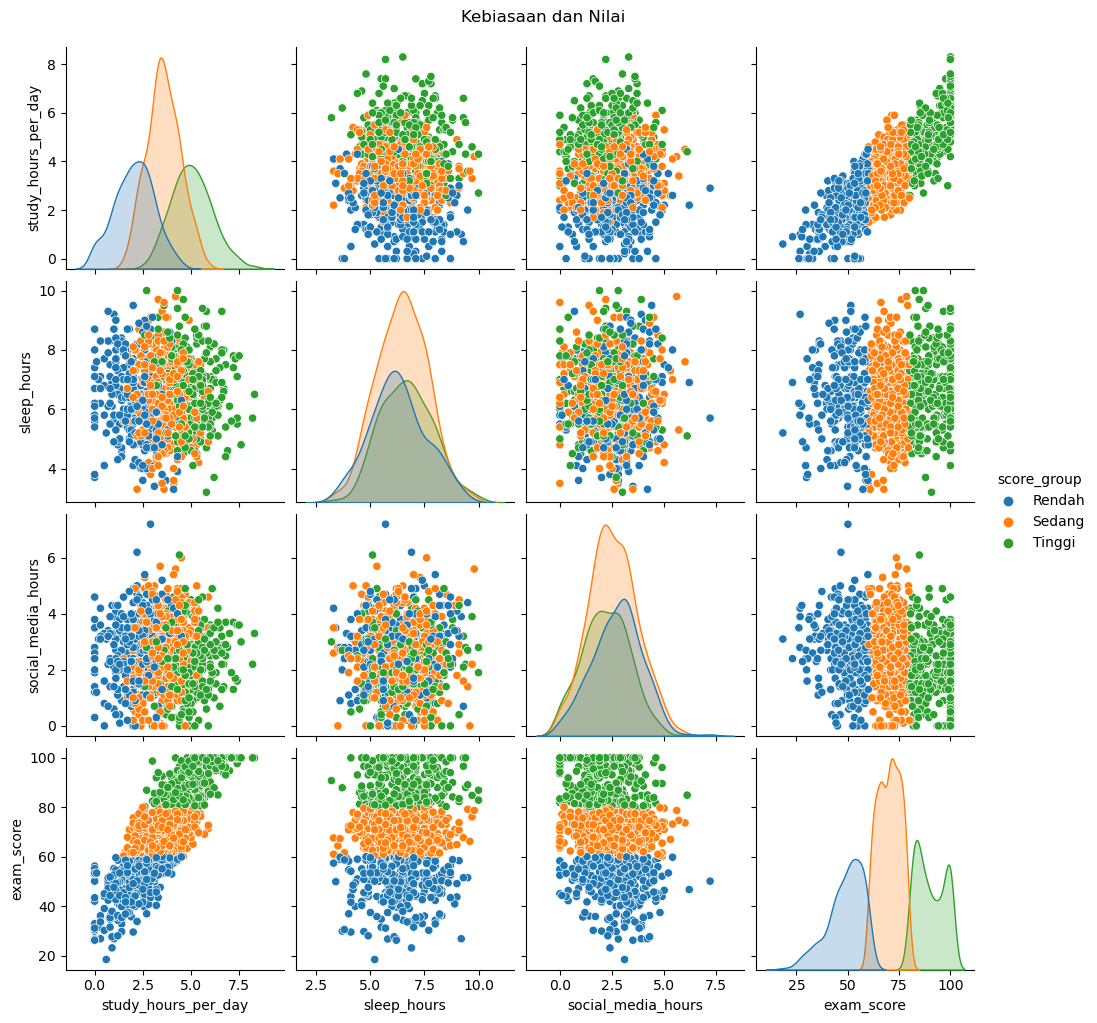

In [34]:
sns.pairplot(df, vars=['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'exam_score'], hue='score_group')
plt.suptitle("Kebiasaan dan Nilai", y=1.02)
plt.show()

Visualisasi ini menggunakan pairplot untuk menunjukkan hubungan antara kebiasaan siswa (jam belajar per hari, jam tidur, dan waktu penggunaan media sosial) dengan nilai ujian akhir, yang dikelompokkan berdasarkan kategori skor: Rendah, Sedang, dan Tinggi. Dari grafik, terlihat pola yang cukup jelas: siswa dengan nilai tinggi (hijau) cenderung memiliki jam belajar yang lebih banyak, menghabiskan waktu lebih sedikit di media sosial, dan memiliki pola tidur yang cukup baik. Sebaliknya, kelompok nilai rendah (biru) lebih sering tampak di area dengan jam belajar rendah dan penggunaan media sosial yang tinggi. Hubungan positif antara jam belajar dan nilai juga tampak dari grafik diagonal bawah kiri ke atas kanan. Kesimpulan dari visualisasi ini adalah bahwa kebiasaan positif seperti belajar teratur, tidur cukup, dan mengurangi media sosial berkorelasi dengan prestasi akademik yang lebih tinggi, sebuah temuan penting yang dapat digunakan dalam intervensi pendidikan.

In [35]:
correlation = df[['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'exam_score']].corr()
print(correlation['exam_score'].sort_values(ascending=False))

exam_score             1.000000
study_hours_per_day    0.825419
sleep_hours            0.121683
social_media_hours    -0.166733
Name: exam_score, dtype: float64



Hasil analisis korelasi ini menunjukkan hubungan antara beberapa kebiasaan siswa dengan nilai ujian mereka. Variabel jam belajar per hari memiliki korelasi positif yang sangat kuat terhadap nilai ujian (r = 0.83), yang berarti semakin banyak waktu yang dihabiskan siswa untuk belajar, semakin tinggi kemungkinan mereka mendapatkan nilai ujian yang baik. Jam tidur memiliki korelasi positif namun lemah (r = 0.12), menunjukkan bahwa meskipun tidur cukup bisa berdampak baik, pengaruhnya tidak sebesar jam belajar. Sementara itu, waktu penggunaan media sosial menunjukkan korelasi negatif (r = -0.17) terhadap nilai ujian, mengindikasikan bahwa semakin sering siswa menghabiskan waktu di media sosial, cenderung semakin rendah nilai ujiannya. Dengan kata lain, fokus pada peningkatan jam belajar dan pengurangan waktu di media sosial bisa menjadi strategi efektif dalam meningkatkan prestasi akademik.

In [36]:
df.groupby('score_group')['mental_health_rating'].mean()

score_group
Rendah    4.439716
Sedang    5.348416
Tinggi    6.601449
Name: mental_health_rating, dtype: float64

Hasil analisis ini menunjukkan adanya hubungan positif antara tingkat nilai akademik siswa dan kesehatan mental mereka. Siswa dengan nilai rendah memiliki rata-rata skor kesehatan mental sebesar 4.44, sementara siswa dengan nilai sedang memiliki rata-rata 5.35, dan siswa dengan nilai tinggi memiliki rata-rata 6.60. Ini mengindikasikan bahwa semakin tinggi prestasi akademik siswa, semakin baik pula kondisi kesehatan mental mereka secara umum. Meskipun data ini tidak membuktikan hubungan sebab-akibat, temuan ini dapat menjadi pertimbangan penting dalam dunia pendidikan bahwa menciptakan lingkungan belajar yang mendukung secara mental dapat berkontribusi terhadap pencapaian akademik yang lebih baik.










In [37]:
df.groupby('extracurricular_participation')['exam_score'].mean()

extracurricular_participation
No     69.591349
Yes    69.623270
Name: exam_score, dtype: float64

Hasil ini menunjukkan bahwa rata-rata skor ujian siswa yang tidak mengikuti kegiatan ekstrakurikuler adalah 69.59, sementara siswa yang mengikuti kegiatan ekstrakurikuler memiliki rata-rata skor ujian sebesar 69.62. Meskipun terdapat perbedaan kecil sebesar 0.03 poin antara kedua kelompok, perbedaan ini tidak cukup signifikan untuk menyimpulkan bahwa partisipasi dalam kegiatan ekstrakurikuler memiliki pengaruh besar terhadap skor ujian. Secara keseluruhan, baik siswa yang berpartisipasi dalam kegiatan ekstrakurikuler maupun yang tidak, memiliki skor ujian yang hampir sama, yang menunjukkan bahwa faktor lain mungkin perlu dipertimbangkan untuk analisis lebih mendalam.

In [38]:
import statsmodels.api as sm

# Pilih variabel numerik relevan
features = df[['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'exercise_frequency', 'mental_health_rating']]
X = sm.add_constant(features)
y = df['exam_score']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1374.
Date:                Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                        21:17:23   Log-Likelihood:                -3211.0
No. Observations:                1000   AIC:                             6434.
Df Residuals:                     994   BIC:                             6463.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.8155 

Hasil regresi OLS menunjukkan bahwa model ini menjelaskan 87.4% variabilitas dalam skor ujian, dengan model secara keseluruhan signifikan (p-value F-statistic = 0.00). Koefisien regresi menunjukkan bahwa jam belajar per hari memiliki pengaruh positif yang signifikan terhadap skor ujian (9.65 poin per jam), begitu juga dengan jam tidur (2.02 poin per jam) dan frekuensi olahraga (1.46 poin). Sebaliknya, penggunaan media sosial memiliki pengaruh negatif yang signifikan terhadap skor ujian (-2.60 poin per jam). Rating kesehatan mental juga berhubungan positif dengan skor ujian (1.93 poin per peningkatan 1 poin). Nilai Durbin-Watson yang mendekati 2 menunjukkan bahwa tidak ada masalah autokorelasi dalam residual, dan distribusi residual cenderung normal, menandakan bahwa asumsi regresi OLS dipenuhi. Secara keseluruhan, model ini mengindikasikan bahwa faktor-faktor seperti jam belajar, tidur, media sosial, olahraga, dan kesehatan mental memiliki pengaruh signifikan terhadap skor ujian siswa.

In [39]:
# Misal kriteria risiko:
risk_df = df[(df['study_hours_per_day'] < 1.5) & 
             (df['sleep_hours'] < 6) & 
             (df['mental_health_rating'] < 4)]

print("Jumlah siswa berisiko:", len(risk_df))
print(risk_df[['student_id', 'exam_score', 'study_hours_per_day', 'mental_health_rating']])

Jumlah siswa berisiko: 6
    student_id  exam_score  study_hours_per_day  mental_health_rating
92       S1092        43.9                  0.5                     3
212      S1212        29.7                  1.4                     2
431      S1431        29.9                  0.0                     2
603      S1603        35.8                  1.1                     3
922      S1922        44.3                  1.3                     2
938      S1938        28.0                  1.2                     1


Hasil ini menunjukkan bahwa terdapat 6 siswa yang berisiko berdasarkan kriteria yang ditetapkan, yaitu siswa yang memiliki jam belajar per hari kurang dari 1.5 jam, jam tidur kurang dari 6 jam, dan rating kesehatan mental kurang dari 4. Data tersebut menampilkan informasi tentang siswa yang termasuk dalam kategori risiko, dengan detail seperti student_id, skor ujian, jam belajar per hari, dan rating kesehatan mental. Siswa-siswa ini cenderung memiliki skor ujian yang lebih rendah, yang mungkin mencerminkan pengaruh dari faktor-faktor seperti kurangnya waktu belajar, kurang tidur, dan masalah kesehatan mental. Hal ini dapat menjadi indikator bahwa siswa-siswa ini membutuhkan perhatian lebih untuk memperbaiki faktor-faktor tersebut guna meningkatkan hasil akademik mereka.